# ELPv2

In [3]:
from data import all_df, df1, df2, df3, df4, df5, features
from datetime import datetime
import pandas as pd
import numpy as np

### Features

In [5]:
from utils import add_wldha

home = 1
away = 2
draw = 3

X = all_df[features.keys()].copy()

X['Date'] = pd.to_datetime(X.Date, format="%d/%m/%Y")
X['Time'] = X.Time.str.replace(':.+', '', regex=True).astype(int)
X['DayCode'] = X.Date.dt.dayofweek
X['AwayTeam'] = X['AwayTeam'].astype('category').cat.codes

add_wldha(X)

X = X.drop('FTR', axis=1)

num_cols = X.select_dtypes(exclude='object').columns
cat_cols = X.select_dtypes(include='object').columns

### Preprocesor

In [1594]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = X[:1700], X[1700:], y[:1700], y[1700:]

preprocesor = ColumnTransformer(transformers=[
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=1000), cat_cols),
])

model_perfomance = {}

MAE: 0.69 | Acc Score: 0.345| kwargs={'max_leaf_nodes': 99}e}(11, 0.67)


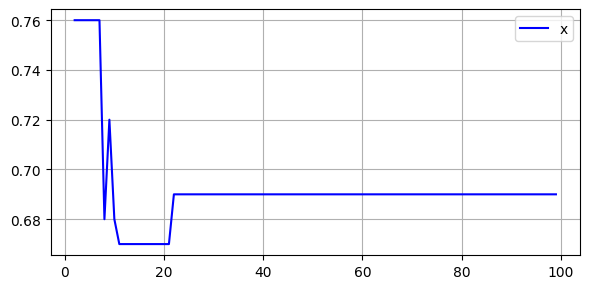

In [1595]:
from sklearn.tree import DecisionTreeRegressor

max_leaf_nodes = [None, *list(range(2, 100))]

res = {}
for max_leaf_node in max_leaf_nodes:
    res[max_leaf_node], tree_pred = (score_model(X_train, X_valid, y_train, y_valid, model=DecisionTreeRegressor, preprocesor=preprocesor, max_leaf_nodes=max_leaf_node))

print(min(res.items(), key=lambda item: item[1]))
display_plot(max_leaf_nodes, res.values())

model_perfomance.setdefault('DecisionTreeRegressor', {})
model_perfomance['DecisionTreeRegressor']['max_leaf_nodes'] = min(res.items(), key=lambda item: item[1])

#### RandomForestClassifier

MAE: 0.88 | kwargs={'max_leaf_nodes': 24}e}(15, 0.85)


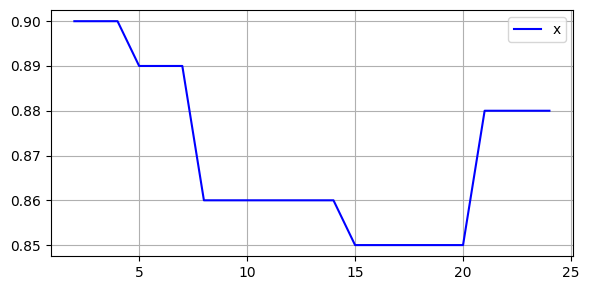

In [1576]:
from sklearn.ensemble import RandomForestClassifier

max_leaf_nodes = [None, *list(range(2, 25))]

res = {}
for max_leaf_node in max_leaf_nodes:
    res[max_leaf_node], _ = score_model(
        X_train, X_valid, y_train, y_valid, 
        model=RandomForestClassifier, 
        preprocesor=preprocesor, 
        max_leaf_nodes=max_leaf_node,
        flush=True
    )


print(min(res.items(), key=lambda item: item[1]))
display_plot(max_leaf_nodes, res.values())

model_perfomance.setdefault('RandomForestClassifier', {})
model_perfomance['RandomForestClassifier']['max_leaf_nodes'] = min(res.items(), key=lambda item: item[1])

MAE: 0.88 | kwargs={'n_estimators': 147}(32, 0.85)


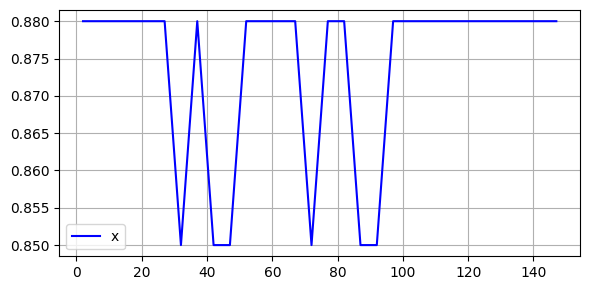

In [1577]:
n_estimators = list(range(2, 150, 5))

res = {}
for n_estimator in n_estimators:
    res[n_estimator], _ = score_model(
        X_train, X_valid, y_train, y_valid, 
        model=RandomForestClassifier, 
        preprocesor=preprocesor, 
        n_estimators=n_estimator,
        flush=True,
    )


print(min(res.items(), key=lambda item: item[1]), sep='\n')
display_plot(n_estimators, res.values())

model_perfomance.setdefault('RandomForestClassifier', {})
model_perfomance['RandomForestClassifier']['n_estimators'] = min(res.items(), key=lambda item: item[1])

In [1578]:
max_leaf_nodes = [None, *list(range(2, 50, 5))]
n_estimators = list(range(2, 75, 5))

res = {}
for max_leaf_node in max_leaf_nodes:
    for n_estimator in n_estimators:
        res[f"{max_leaf_node} {n_estimator}"], _ = score_model(
            X_train, X_valid, y_train, y_valid, 
            model=RandomForestClassifier, 
            preprocesor=preprocesor, 
            max_leaf_nodes=max_leaf_node,
            n_estimators=n_estimator,
            flush=True
        )

print(min(res.items(), key=lambda item: item[1]))

model_perfomance.setdefault('RandomForestClassifier', {})
model_perfomance['RandomForestClassifier']['max_leaf + n_estimators'] = min(res.items(), key=lambda item: item[1])

MAE: 0.85 | kwargs={'max_leaf_nodes': 47, 'n_estimators': 72}2}('17 2', 0.81)


#### RandomForestRegressor

(None, 0.35)


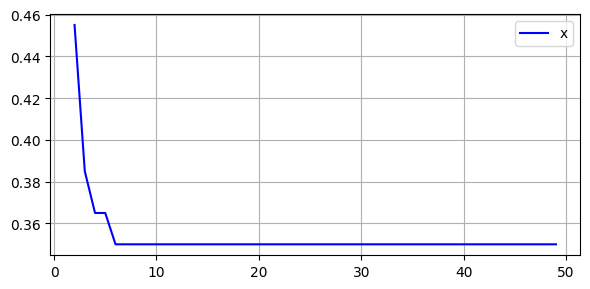

In [1524]:
from sklearn.ensemble import RandomForestRegressor

max_leaf_nodes = [None, *list(range(2, 50))]

res = {}
for max_leaf_node in max_leaf_nodes:
    res[max_leaf_node], _ = score_model(
        X_train, X_valid, y_train, y_valid, 
        model=RandomForestRegressor, 
        preprocesor=preprocesor, 
        max_leaf_nodes=max_leaf_node,
        flush=False
    )


print(min(res.items(), key=lambda item: item[1]))
display_plot(max_leaf_nodes, res.values())

model_perfomance.setdefault('RandomForestRegressor', {})
model_perfomance['RandomForestRegressor']['max_leaf_nodes'] = min(res.items(), key=lambda item: item[1])

MAE: 0.35 | kwargs={'n_estimators': 147}(2, 0.33)


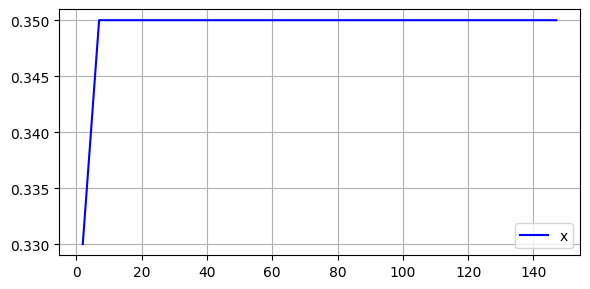

In [1525]:
n_estimators = list(range(2, 150, 5))

res = {}
for n_estimator in n_estimators:
    res[n_estimator], _ = score_model(
        X_train, X_valid, y_train, y_valid, 
        model=RandomForestRegressor, 
        preprocesor=preprocesor, 
        n_estimators=n_estimator,
        flush=True,
    )


print(min(res.items(), key=lambda item: item[1]), sep='\n')
display_plot(n_estimators, res.values())

model_perfomance.setdefault('RandomForestRegressor', {})
model_perfomance['RandomForestRegressor']['n_estimators'] = min(res.items(), key=lambda item: item[1])

In [1526]:
max_leaf_nodes = [None, *list(range(2, 50, 5))]
n_estimators = list(range(2, 75, 5))

res = {}
for max_leaf_node in max_leaf_nodes:
    for n_estimator in n_estimators:
        res[f"{max_leaf_node} {n_estimator}"], _ = score_model(
            X_train, X_valid, y_train, y_valid, 
            model=RandomForestRegressor, 
            preprocesor=preprocesor, 
            max_leaf_nodes=max_leaf_node,
            n_estimators=n_estimator,
            flush=True
        )

print(min(res.items(), key=lambda item: item[1]))

model_perfomance.setdefault('RandomForestRegressor', {})
model_perfomance['RandomForestRegressor']['max_leaf + n_estimators'] = min(res.items(), key=lambda item: item[1])

MAE: 0.35 | kwargs={'max_leaf_nodes': 47, 'n_estimators': 72}2}('None 2', 0.33)


#### XGBRegressor

MAE: 0.35 | kwargs={'n_estimators': 145}(5, 0.35)


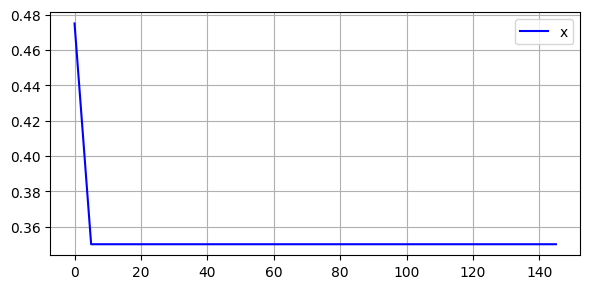

In [1527]:
from xgboost import XGBRegressor


n_estimators = list(range(0, 150, 5))

res = {}
for n_estimator in n_estimators:
    res[n_estimator], _ = score_model(
        X_train, X_valid, y_train, y_valid, 
        model=XGBRegressor, 
        preprocesor=preprocesor, 
        n_estimators=n_estimator,
        flush=True,
    )


print(min(res.items(), key=lambda item: item[1]), sep='\n')
display_plot(n_estimators, res.values())

model_perfomance['XGBRegressor'] = {}
model_perfomance['XGBRegressor']['n_estimators'] = min(res.items(), key=lambda item: item[1])

In [1528]:
import json

print(json.dumps(model_perfomance, indent=4))

{
    "DecisionTreeRegressor": {
        "max_leaf_nodes": [
            null,
            0.35
        ]
    },
    "RandomForestClassifier": {
        "max_leaf_nodes": [
            null,
            0.35
        ],
        "n_estimators": [
            2,
            0.33
        ],
        "max_leaf + n_estimators": [
            "None 2",
            0.33
        ]
    },
    "RandomForestRegressor": {
        "max_leaf_nodes": [
            null,
            0.35
        ],
        "n_estimators": [
            2,
            0.33
        ],
        "max_leaf + n_estimators": [
            "None 2",
            0.33
        ]
    },
    "XGBRegressor": {
        "n_estimators": [
            5,
            0.35
        ]
    }
}


### Predict

In [1579]:
from sklearn.ensemble import RandomForestClassifier

my_pipeline = Pipeline(
    steps=[
        ('preprocesor', preprocesor),
        ('model', DecisionTreeRegressor(max_leaf_nodes=11, random_state=0)),
    ]
)

my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocesor',
                 ColumnTransformer(transformers=[('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=1000),
                                                  Index(['HomeTeam'], dtype='object'))])),
                ('model',
                 DecisionTreeRegressor(max_leaf_nodes=11, random_state=0))])

In [1581]:
# y = _df.FTR.replace('H', '1').replace('A', '2').replace('D', '0').astype(int)
import numpy as np

predictions = my_pipeline.predict(X_valid)

res_df = pd.DataFrame({
    'pred': predictions, 
    'pred_round': [i  for i in predictions],
    'valid': y_valid, 
    'D': X_valid.B365D,
    'H': X_valid.B365H, 
    'A': X_valid.B365A
})

res_df['valid_rai'] = np.where(
    res_df['pred_round'] == draw, res_df['D'], 
    np.where(
        res_df['pred_round'] == home, res_df['H'], res_df['A']
    )
)


res_df['my_rai'] = np.where(res_df['pred_round'] == res_df['valid'], abs(100 - (res_df['valid_rai'] * 100)), -100)

print(f"Margin: {res_df.my_rai.sum()}, Won: {(res_df[res_df['my_rai'] > 0]['my_rai']+100).sum()} (100$/bet), Spent {res_df.my_rai.count() * 100} ({(res_df.my_rai > 0).sum()} wins, {(res_df.my_rai < 0).sum()} loses)")
print(res_df.head(55))

print('H:', (res_df.pred_round == home).sum())
print('D:', (res_df.pred_round == draw).sum())
print('A:', (res_df.pred_round == away).sum())


print('Won: ', (res_df[(res_df['my_rai'] > 0) & (res_df['pred_round'] == 1)]['my_rai']).sum())


Margin: 16288.0, Won: 36288.0 (100$/bet), Spent 20000 (68 wins, 132 loses)
         pred  pred_round  valid      D      H      A  valid_rai  my_rai
180  1.014194           1      2   3.75   2.10   3.30       2.10  -100.0
181  1.014194           1      1   3.90   3.50   1.95       3.50   250.0
182  1.014194           1      0   5.25   1.33   9.00       1.33  -100.0
183  1.014194           1      2   3.40   2.30   3.10       2.30  -100.0
184  1.014194           1      2   3.75   1.70   5.00       1.70  -100.0
185  0.774834           1      1   3.60   1.83   4.33       1.83    83.0
186  1.305882           1      2   5.25   1.33   9.00       1.33  -100.0
187  1.014194           1      0   3.75   3.40   2.05       3.40  -100.0
188  1.059172           1      2   5.00   8.50   1.36       8.50  -100.0
189  1.014194           1      2   3.90   1.75   4.33       1.75  -100.0
190  1.305882           1      0   3.40   3.60   2.05       3.60  -100.0
191  0.774834           1      1   3.60   1.95   

In [1273]:
from sklearn.model_selection import cross_val_score

def cross_validate_random_forest(n_estimators, X, y, cv=10):
    # Multiply by -1 since sklearn calculates *negative* MAE
    scores = -1 * cross_val_score(
        my_pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error'
    )

    return scores


results = {n_estimators: cross_validate_random_forest(n_estimators, X, y) for n_estimators in range(1, 4)}

print("MAE scores:\n", results)

MAE scores:
 {1: array([0.80136679, 0.60570783, 0.59643957, 0.61944261, 0.68500548,
       0.6989265 , 0.70749838, 0.58831867, 0.56818087, 0.58615742]), 2: array([0.80136679, 0.60570783, 0.59643957, 0.61944261, 0.68500548,
       0.6989265 , 0.70749838, 0.58831867, 0.56818087, 0.58615742]), 3: array([0.80136679, 0.60570783, 0.59643957, 0.61944261, 0.68500548,
       0.6989265 , 0.70749838, 0.58831867, 0.56818087, 0.58615742])}


In [1514]:
{
    "DecisionTreeRegressor": {
        "max_leaf_nodes": [
            55,
            0.5
        ]
    },
    "RandomForestClassifier": {
        "max_leaf_nodes": [
            2,
            0.525
        ],
        "n_estimators": [
            2,
            0.725
        ],
        "max_leaf + n_estimators": [
            "2 12",
            0.515
        ]
    },
    "RandomForestRegressor": {
        "max_leaf_nodes": [
            2,
            0.525
        ],
        "n_estimators": [
            47,
            0.68
        ],
        "max_leaf + n_estimators": [
            "12 7",
            0.51
        ]
    },
    "XGBRegressor": {
        "n_estimators": [
            5,
            0.54
        ]
    }
}

{'DecisionTreeRegressor': {'max_leaf_nodes': [55, 0.5]},
 'RandomForestClassifier': {'max_leaf_nodes': [2, 0.525],
  'n_estimators': [2, 0.725],
  'max_leaf + n_estimators': ['2 12', 0.515]},
 'RandomForestRegressor': {'max_leaf_nodes': [2, 0.525],
  'n_estimators': [47, 0.68],
  'max_leaf + n_estimators': ['12 7', 0.51]},
 'XGBRegressor': {'n_estimators': [5, 0.54]}}